This is a small project utilizing the differenet GenAI architectures to generate new bird & Pokemon names.

In [1]:
import csv

filename = '../data/birds.csv' # donwloaded from https://www.kaggle.com/datasets/thepushkarp/common-bird-names?resource=download

with open(filename, newline='') as f:
    reader = csv.reader(f)
    data = [n for _,n in list(reader)[1:]]

print(*data[:5], sep='\n')

Abbott's babbler
Abbott's booby
Abbott's starling
Abbott's sunbird
Abd al-Kuri sparrow


In [2]:
len(data)

10976

In [3]:
import random as rn

rn.choices(data, k=10)

["Snethlage's tody-tyrant",
 'Tenerife blue chaffinch',
 'Indian courser',
 'Cape siskin',
 'Brown emutail',
 'Pale martin',
 'Beautiful sheartail',
 'Tawny fish owl',
 'Montane nightjar',
 'Chocó trogon']

In [4]:
data_lower = list(map(str.lower, data))
data_lower[:5]

["abbott's babbler",
 "abbott's booby",
 "abbott's starling",
 "abbott's sunbird",
 'abd al-kuri sparrow']

In [5]:
chars = set()
for s in data_lower:
    chars = chars.union(s)
chars = sorted(list(chars))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 '-.abcdefghijklmnopqrstuvwxyzáãäèéíñóôöúüāēōūʻ
47


In [6]:
chars_to_drop = list(chars[30:]) + ['.']
print(''.join(chars_to_drop))

áãäèéíñóôöúüāēōūʻ.


In [7]:
chars_to_drop_set = set(chars_to_drop)
data_to_drop = list(filter(lambda n: chars_to_drop_set.intersection(n), data_lower))
print(f'To drop {len(data_to_drop)} out of {len(data)}, {len(data_to_drop)/len(data)*100:.2f}%')
print(*data_to_drop[:-5], sep='\n')

To drop 159 out of 10976, 1.45%
adélie penguin
alström's warbler
annobón paradise flycatcher
annobón white-eye
apurímac brushfinch
apurímac spinetail
atitlán grebe
baudó oropendola
bogotá rail
brasília tapaculo
böhm's bee-eater
böhm's flycatcher
böhm's spinetail
caquetá seedeater
ceará gnateater
chiloé wigeon
chocó poorwill
chocó screech owl
chocó tapaculo
chocó trogon
chocó vireo
chocó woodpecker
clarión wren
córdoba cinclodes
española cactus finch
fülleborn's boubou
fülleborn's longclaw
galápagos dove
galápagos martin
galápagos mockingbird
galápagos petrel
galápagos shearwater
greater ʻamakihi
güldenstädt's redstart
hawaiʻi creeper
hawaiʻi ʻakepa
hawaiʻi ʻamakihi
hawaiʻi ʻelepaio
hawaiʻi ʻōʻō
juan fernández firecrown
juan fernández petrel
juan fernández tit-tyrant
junín canastero
kauaʻi nukupuʻu
kauaʻi ʻakialoa
kauaʻi ʻamakihi
kauaʻi ʻelepaio
kauaʻi ʻōʻō
kererū
krüper's nuthatch
kākāwahie
kāmaʻo
lesser ʻakialoa
lühder's bushshrike
lānaʻi hookbill
manicoré warbling antbird
marañón cre

In [8]:
data_filtered = list(filter(lambda n: not chars_to_drop_set.intersection(n), data_lower))
print(f'Remaining {len(data_filtered)} out of {len(data)}, {len(data_filtered)/len(data)*100:.2f}%')
print(*(data_filtered[:5]), sep='\n')

Remaining 10817 out of 10976, 98.55%
abbott's babbler
abbott's booby
abbott's starling
abbott's sunbird
abd al-kuri sparrow


In [9]:
chars = set()
for s in data_filtered:
    chars = chars.union(s)
chars = list(sorted(chars))
chars = ['#'] + chars
vocab_size = len(chars)
print(''.join(sorted(chars)))
print(vocab_size)

 #'-abcdefghijklmnopqrstuvwxyz
30


In [10]:
ch2i = { ch:i for i,ch in enumerate(chars)}
i2ch = { i:ch for i,ch in enumerate(chars)}
encode = lambda st: [ch2i[ch] for ch in st]
decode = lambda l: [i2ch[i] for i in l]

In [11]:
data_filtered[0], encode(data_filtered[0]), ''.join(decode(encode(data_filtered[0])))

("abbott's babbler",
 [4, 5, 5, 18, 23, 23, 2, 22, 1, 5, 4, 5, 5, 15, 8, 21],
 "abbott's babbler")

In [12]:
min([len(n) for n in data_filtered]), max([len(n) for n in data_filtered])

(3, 35)

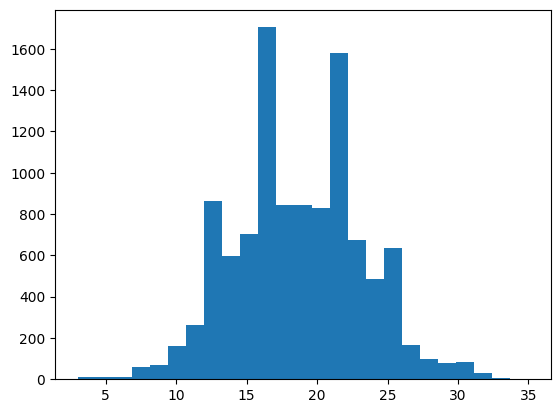

In [13]:
from matplotlib import pyplot as plt

plt.hist([len(n) for n in data_filtered], bins=25);

In [14]:
print(*sorted(data_filtered, key=len)[:5], sep='\n')

emu
kea
mao
tui
dodo


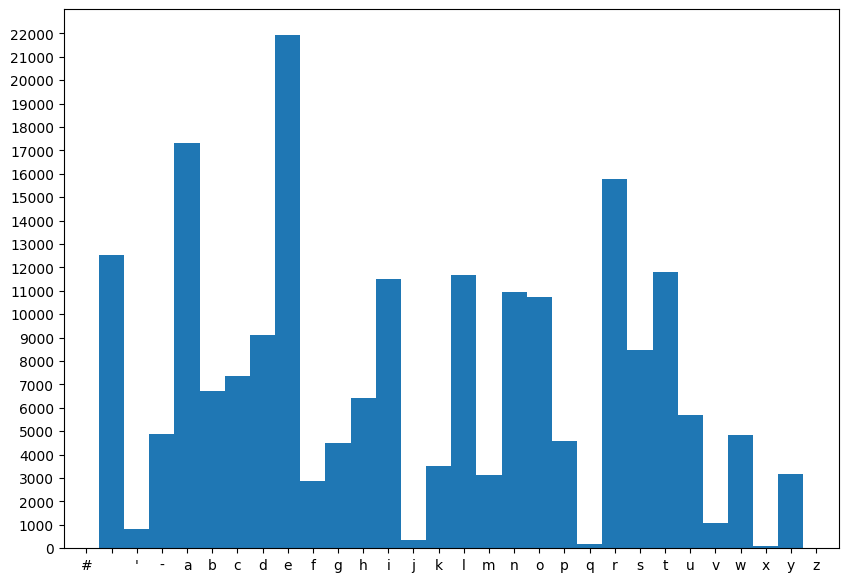

In [17]:
all = []

for n in data_filtered:
    all.extend(encode(n))

plt.figure(figsize=(10,7));
plt.hist(all, bins=vocab_size-2);
plt.xticks([x+.5 for x in range(vocab_size)], [i2ch[i] for i in range(vocab_size)]);
plt.yticks(range(0, 23000, 1000));
